# Santander Customer Transaction Prediction

## Imports

In [8]:
# !pip install lightgbm
# !pip install xgboost
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing, model_selection
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import sklearn.tree
import time
%matplotlib inline

## Load Data

In [9]:
data = pd.read_csv("train.csv", index_col=0, low_memory=False)
data

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,
train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,-0.6209,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,-3.6797,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,0.1202,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995


In [10]:
data.shape

(200000, 201)

In [11]:
data.isnull().any().sum()

0

In [12]:
data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


# split features from classes

In [13]:
X = data.drop("target", axis=1)
y = data["target"].to_numpy()
print(X.ndim)
print(y.ndim)
print(f"X:{type(X)}")
print(f"y:{type(y)}")

2
1
X:<class 'pandas.core.frame.DataFrame'>
y:<class 'numpy.ndarray'>


<Axes: xlabel='target'>

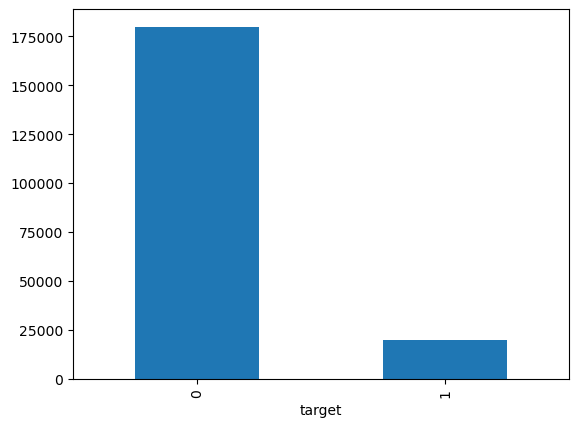

In [14]:
data["target"].value_counts().plot(kind='bar')

In [15]:
X.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,7.567236,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,1.235070,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,3.970500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,6.618800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,7.629600,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,8.584425,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,11.150600,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [16]:
X.dtypes

var_0      float64
var_1      float64
var_2      float64
var_3      float64
var_4      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 200, dtype: object

In [17]:
#correlation matrix for X, features that are most strongly correlated with each other
correl_with_X = X.corr()

correl_pairs = correl_with_X.unstack()
correl_pairs = correl_pairs[
    correl_pairs.index.get_level_values(0) != correl_pairs.index.get_level_values(1)
]

strongest_correl = correl_pairs.abs().sort_values(ascending=False)

top_10_strongest_correl = strongest_correl.head(10)

print("Top 10 Strongest Correlations Between Features in X:")
print(top_10_strongest_correl)

Top 10 Strongest Correlations Between Features in X:
var_139  var_26     0.009844
var_26   var_139    0.009844
var_53   var_148    0.009788
var_148  var_53     0.009788
var_165  var_81     0.009714
var_81   var_165    0.009714
         var_174    0.009490
var_174  var_81     0.009490
var_189  var_183    0.009359
var_183  var_189    0.009359
dtype: float64


In [18]:
#correlation between X and y

y_series = pd.Series(y, index=X.index)

correlation_with_target = X.corrwith(y_series)

top_10_pos = correlation_with_target.nlargest(10)
top_10_neg = correlation_with_target.nsmallest(10)

print("\nTop 10 Features with Highest Positive Correlation with Y:")
print(top_10_pos)
print("\nTop 10 Features with Highest Negative Correlation with Y:")
print(top_10_neg)


Top 10 Features with Highest Positive Correlation with Y:
var_6      0.066731
var_110    0.064275
var_53     0.063399
var_26     0.062422
var_22     0.060558
var_99     0.058367
var_190    0.055973
var_2      0.055870
var_133    0.054548
var_0      0.052390
dtype: float64

Top 10 Features with Highest Negative Correlation with Y:
var_81    -0.080917
var_139   -0.074080
var_12    -0.069489
var_146   -0.063644
var_76    -0.061917
var_174   -0.061669
var_21    -0.058483
var_166   -0.057773
var_80    -0.057609
var_165   -0.055734
dtype: float64


Train Test Split

In [19]:
#training and test 80% train /20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train_series = pd.Series(y_train, index=X_train.index)

#Take 10% sample of the training data for testing
X_train_sample = X_train.sample(frac=0.1, random_state=42)  # 10% of the training data
y_train_sample = y_train_series.loc[X_train_sample.index]

Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(n_estimators=100, random_state=42)

start_time = time.time()

#rf.fit(X_train, y_train)
rf.fit(X_train_sample, y_train_sample)

y_pred = rf.predict(X_test)

end_time = time.time()
print(f"Training Time: {end_time - start_time:.2f} seconds")

print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Training Time: 40.02 seconds
Random Forest Classifier:
Accuracy: 0.8976

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     35903
           1       0.00      0.00      0.00      4097

    accuracy                           0.90     40000
   macro avg       0.45      0.50      0.47     40000
weighted avg       0.81      0.90      0.85     40000



c:\Users\geoff\Documents\GitHub\Housing-Market-Analysis\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\geoff\Documents\GitHub\Housing-Market-Analysis\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\geoff\Documents\GitHub\Housing-Market-Analysis\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


lgbm = LGBMClassifier(n_estimators=100, random_state=42)

start_time = time.time()

# lgbm.fit(X_train, y_train)
lgbm.fit(X_train_sample, y_train_sample)

y_pred_lgbm = lgbm.predict(X_test)

end_time = time.time()
print(f"Training Time: {end_time - start_time:.2f} seconds")

print("\n LGBM Classifier:")
print(f" Accuracy: {accuracy_score(y_test, y_pred_lgbm):.4f}")
print("\n Classification Report:")
print(classification_report(y_test, y_pred_lgbm))

[LightGBM] [Info] Number of positive: 1569, number of negative: 14431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009385 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51000
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.098062 -> initscore=-2.218940
[LightGBM] [Info] Start training from score -2.218940
Training Time: 0.52 seconds

 LGBM Classifier:
 Accuracy: 0.9033

 Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     35903
           1       0.80      0.07      0.14      4097

    accuracy                           0.90     40000
   macro avg       0.85      0.54      0.54     40000
weighted avg       0.89      0.90      0.87     40000



In [ ]:
#how significant each feature is for making predictions
lgbm.feature_importances_

array([27, 39, 28,  2,  8, 18, 34,  2,  2, 22,  3, 15, 28, 31,  7,  9,  5,
        6, 31,  7, 13, 27, 30,  7, 13,  4, 26,  6, 17,  6,  2,  7, 19, 26,
       25, 13, 18,  2,  5,  3, 36,  5,  8, 18, 29,  8,  5,  3,  6, 24,  4,
       11, 10, 38,  4,  2, 15,  3, 10, 17,  5,  2,  4, 12,  6,  3,  4, 28,
       10, 18, 15, 25,  7,  0,  4, 18, 35,  7, 30,  8, 31, 34, 12, 24,  9,
        5, 23, 28,  9, 14, 11, 26, 21, 14, 21, 10,  2,  7,  1, 37,  9,  3,
        2,  2, 16, 12,  9, 18, 23, 31, 36,  8, 20,  8, 13, 27, 11,  5, 16,
       17, 10, 27, 27, 23,  4, 16,  5, 28,  6,  2,  5, 18, 14, 43,  5, 11,
        3, 10,  7, 31,  4, 10, 14,  8, 13, 13, 33, 10, 19, 34, 23, 10,  7,
        7, 20, 17,  9, 21,  6, 10,  4,  8, 24, 17, 25, 34, 39, 12, 14, 36,
       28, 15, 27, 24, 30, 11,  3, 25,  8, 33, 23,  9,  4,  1, 36,  5,  9,
        7, 19,  4, 31, 26, 17,  8,  3, 20,  6, 16, 34,  7], dtype=int32)

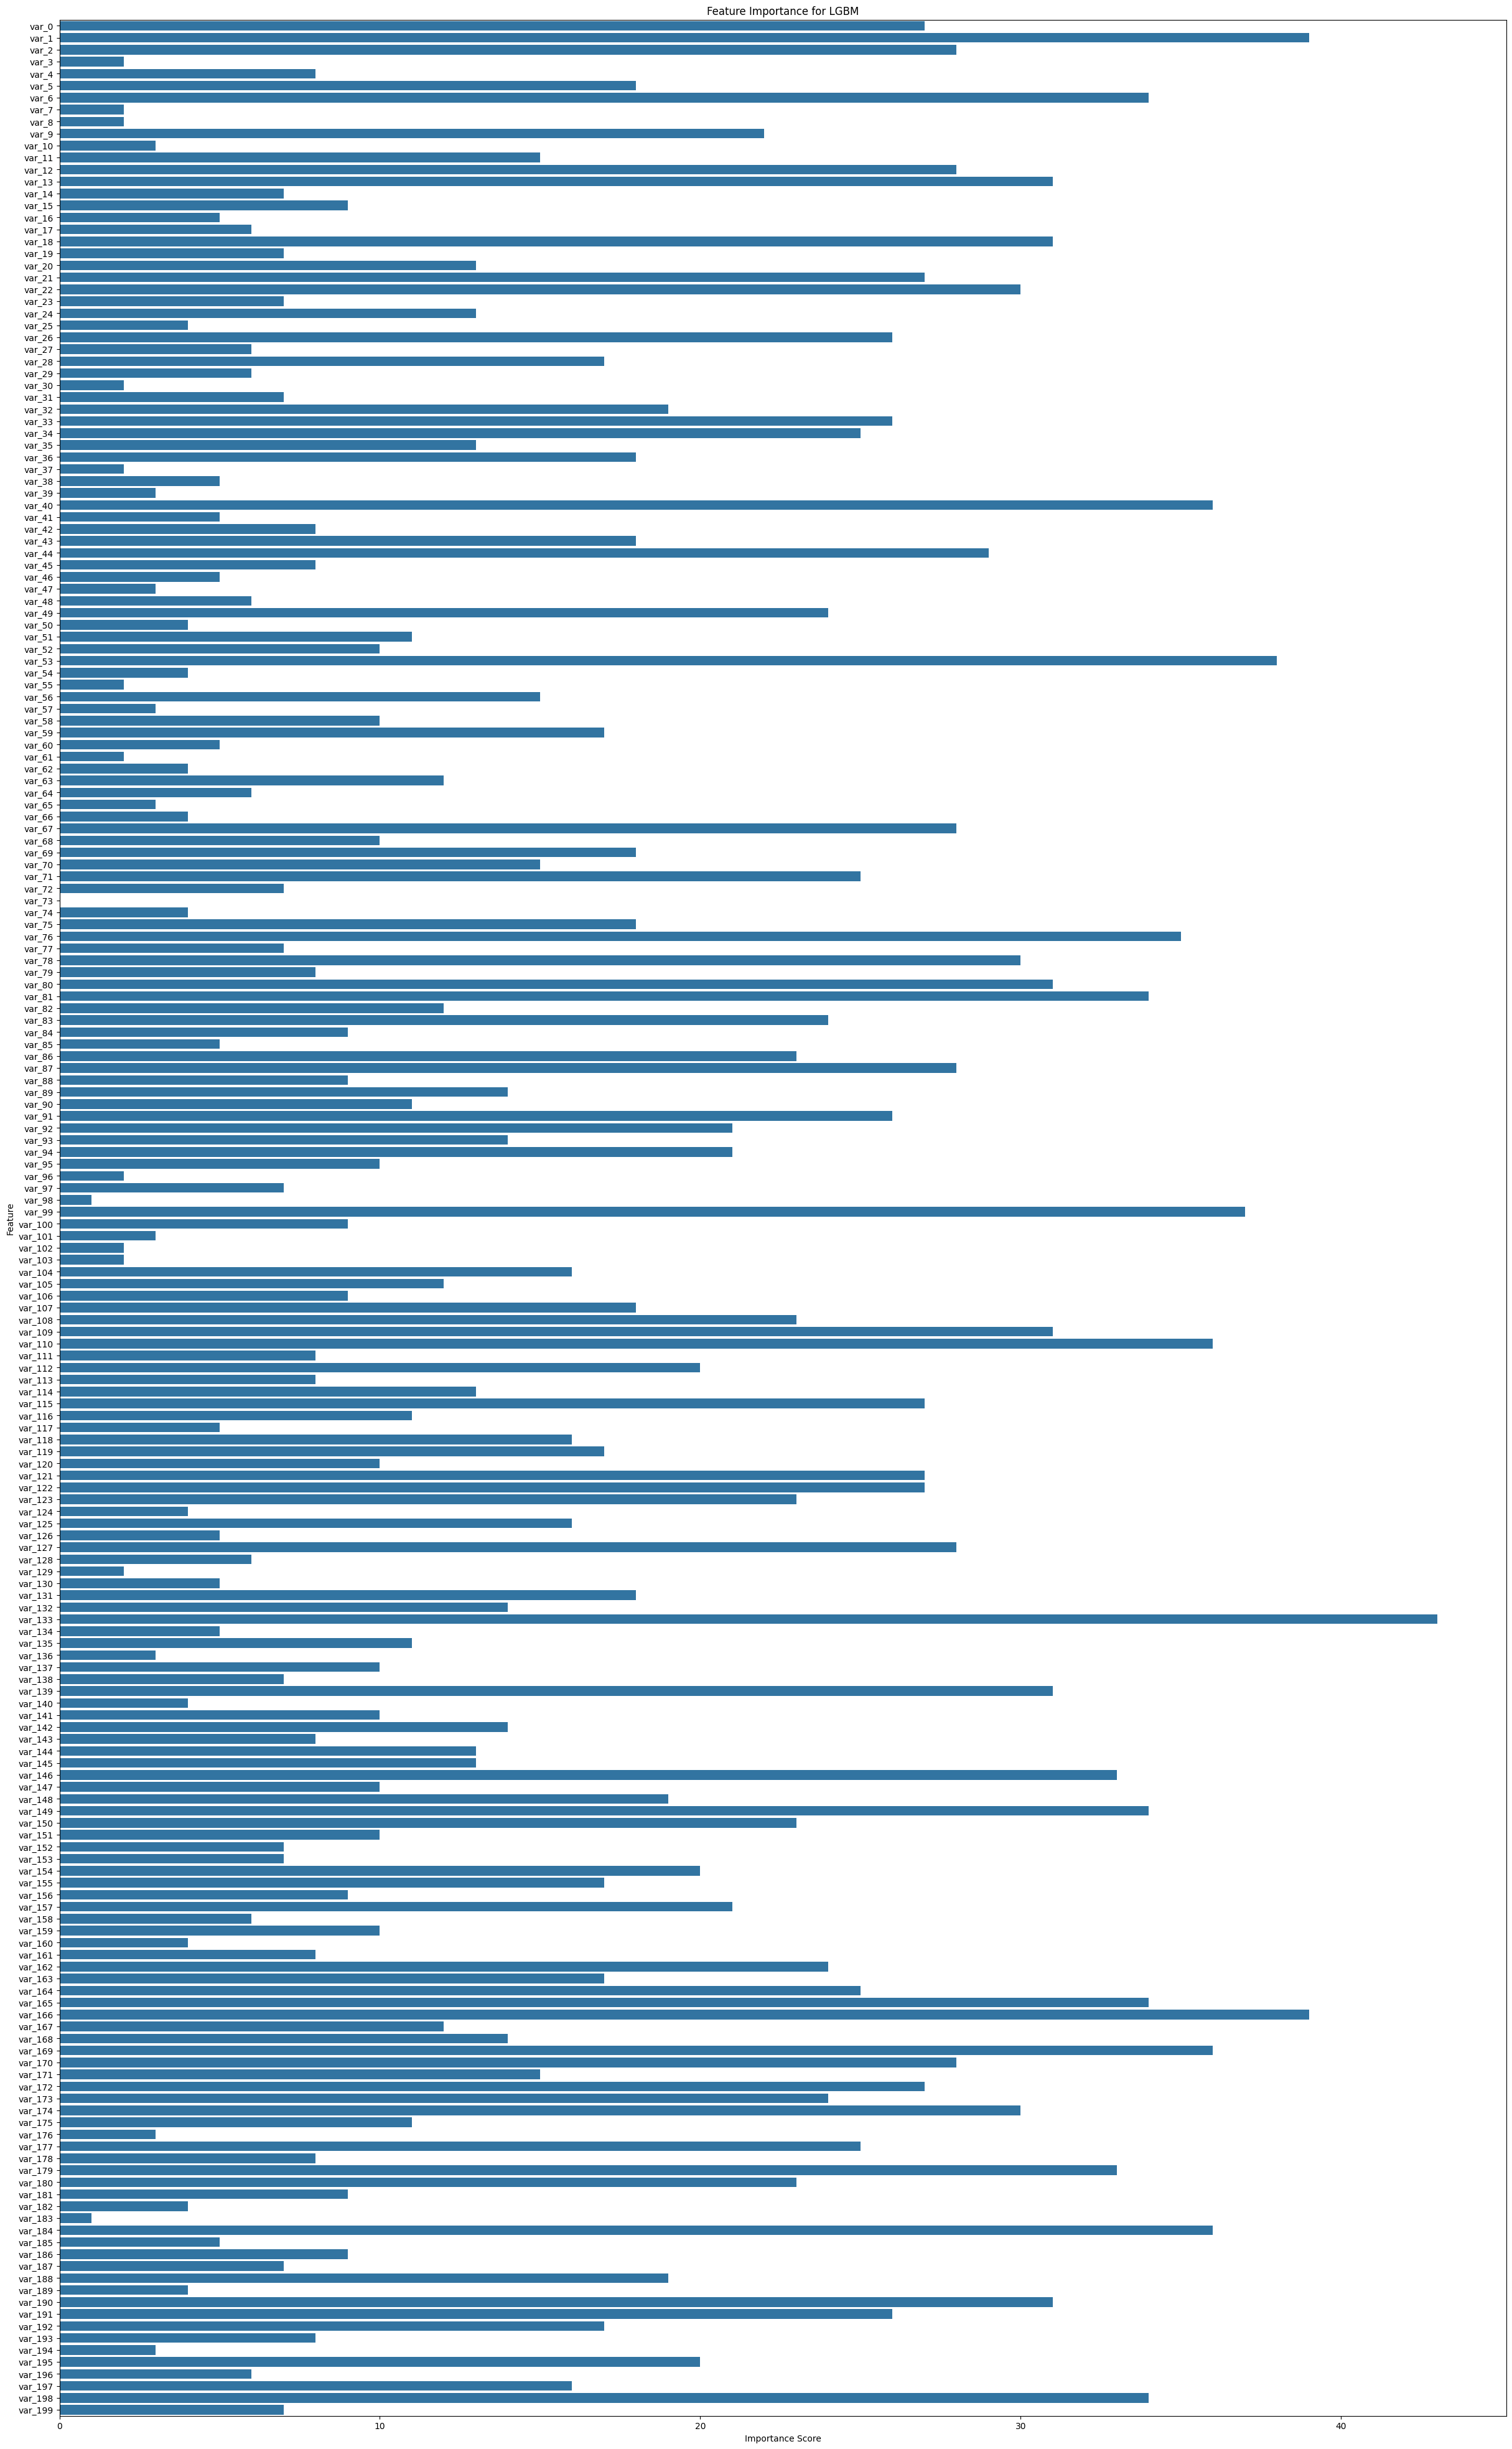

In [ ]:
#sort features in descending order to get the most important features at the top
feat_importances = pd.Series(lgbm.feature_importances_, index=X.columns)
plt.figure(figsize=(30, 50))
sns.barplot(x=feat_importances.values, y=feat_importances.index)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance for LGBM')

plt.show()

In [ ]:
#confusion matrix for lgbm
conf_matrix = confusion_matrix(y_test, y_pred_lgbm)
conf_matrix

array([[35826,    77],
       [ 3792,   305]])

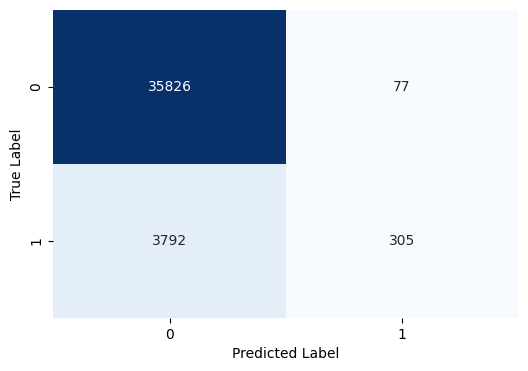

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
#XGboost

xgb= XGBClassifier(n_estimators=100, 
                   random_state=42, 
                   eval_metric='logloss')

start_time = time.time()

# xgb.fit(X_train, y_train)
xgb.fit(X_train_sample, y_train_sample) 


y_pred_xgb = xgb.predict(X_test)

end_time = time.time()
print(f"Training Time: {end_time - start_time:.2f} seconds")

print("\n XGBoost Classifier:")
print(f" Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("\n Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Training Time: 1.15 seconds

 XGBoost Classifier:
 Accuracy: 0.9034

 Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     35903
           1       0.72      0.09      0.16      4097

    accuracy                           0.90     40000
   macro avg       0.81      0.54      0.56     40000
weighted avg       0.89      0.90      0.87     40000



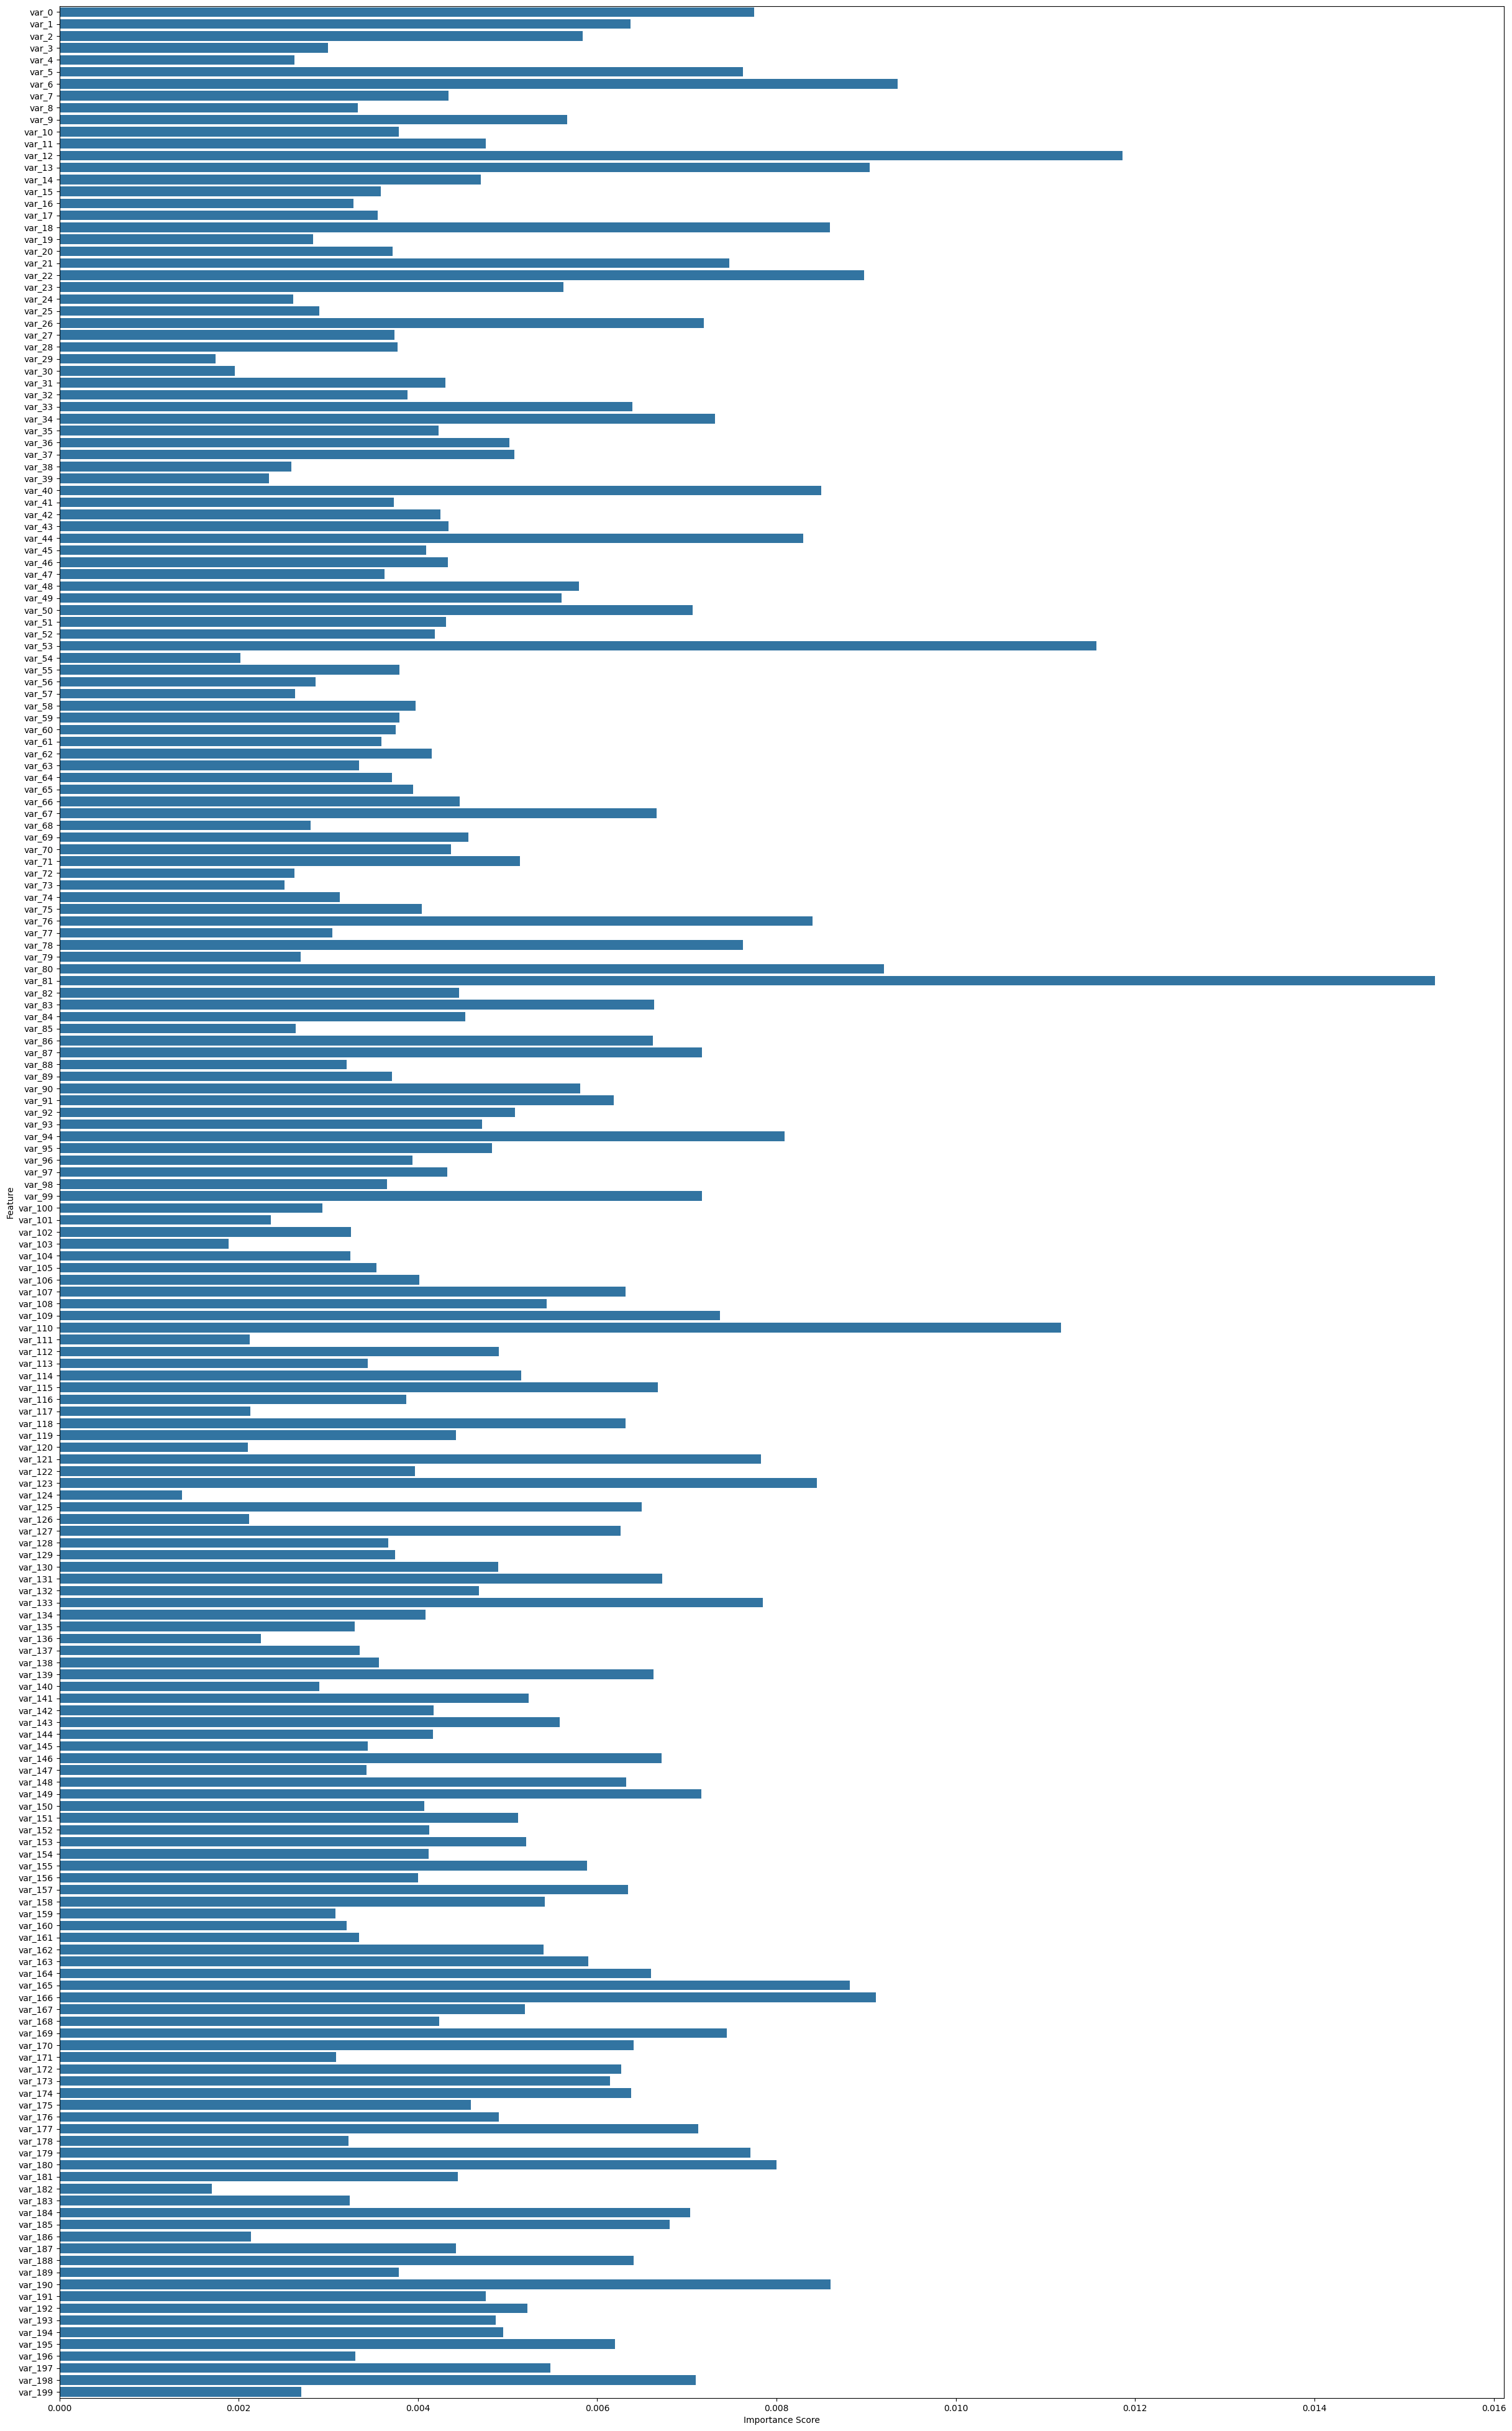

In [ ]:
#feature Importances
feat_importances = pd.Series(xgb.feature_importances_, index=X.columns)
plt.figure(figsize=(30, 50))
sns.barplot(x=feat_importances.values, y=feat_importances.index)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
conf_matrix

array([[35757,   146],
       [ 3718,   379]])

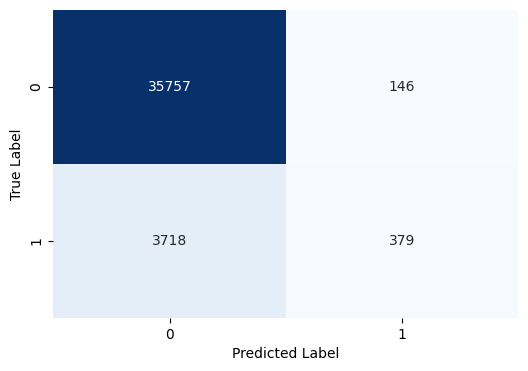

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print(X_train)

                var_0   var_1    var_2   var_3    var_4    var_5   var_6  \
ID_code                                                                    
train_153248  12.3039 -8.3899   9.1944  8.0649   9.0247  -1.9559  5.1565   
train_67802   15.4069  2.7820   9.2951  7.1997   8.5359  -4.5422  5.4210   
train_148889   9.6427 -4.6261   6.9610  5.4054  12.0859 -11.2917  4.5290   
train_103093   9.6881 -5.6696  11.2709  8.2812  13.9232 -16.1434  4.9664   
train_104681   7.1128 -2.0830  11.4807  8.3033  10.6180  -6.4743  5.0078   
...               ...     ...      ...     ...      ...      ...     ...   
train_119879  11.4356  2.1235   9.6502  8.3973  12.7467 -21.6719  4.8715   
train_103694   9.0806 -0.4575  12.2323  5.4625   9.9592 -15.0923  4.0602   
train_131932  16.7760  1.0075  10.2312  8.4240   9.3894   3.9643  5.2315   
train_146867   9.9775  7.4480  12.9018  8.9272   9.7036 -11.1443  3.1534   
train_121958  11.6048 -3.4120   9.0067  5.2555  11.8866  -0.3029  4.2625   

           

# normalize data

In [ ]:

scaler = preprocessing.MinMaxScaler()
# X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X = scaler.fit_transform(X)

print(X)

[[0.42785307 0.32482435 0.56805853 ... 0.43095798 0.32765751 0.56064496]
 [0.55721218 0.42863943 0.6812351  ... 0.4682771  0.6095461  0.60582746]
 [0.41196889 0.48377668 0.57806091 ... 0.38194973 0.42583343 0.58273586]
 ...
 [0.5432771  0.39305749 0.4870996  ... 0.45612437 0.38087342 0.63919915]
 [0.46750324 0.25309006 0.66682332 ... 0.67445942 0.46661746 0.37047369]
 [0.5258457  0.36714503 0.580254   ... 0.36840624 0.29469964 0.57890533]]


# PCA

Before PCA: (200000, 200)
After PCA: (200000, 186)


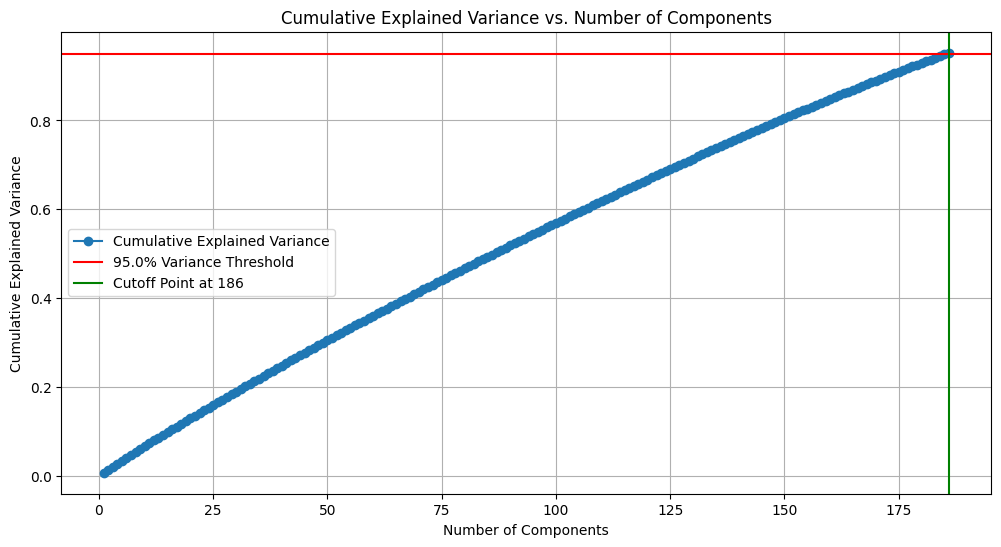

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

print(f"Before PCA: {X.shape}")

variance_threshold = 0.95
pca = PCA(n_components=variance_threshold)
X_pca = pca.fit_transform(X)
print(f"After PCA: {X_pca.shape}")

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
components = range(1, len(explained_variance_ratio) + 1)

plt.figure(figsize=(12, 6))
plt.plot(components, explained_variance_ratio, marker='o', label='Cumulative Explained Variance')
plt.axhline(y=variance_threshold, color='r', label=f'{variance_threshold*100}% Variance Threshold')
cutoff_point = np.argmax(explained_variance_ratio >= variance_threshold) + 1
plt.axvline(x=cutoff_point, color='g', label=f'Cutoff Point at {cutoff_point}')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.legend()

plt.show()


# KNN

## find best k

c:\Users\geoff\Documents\GitHub\Housing-Market-Analysis\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


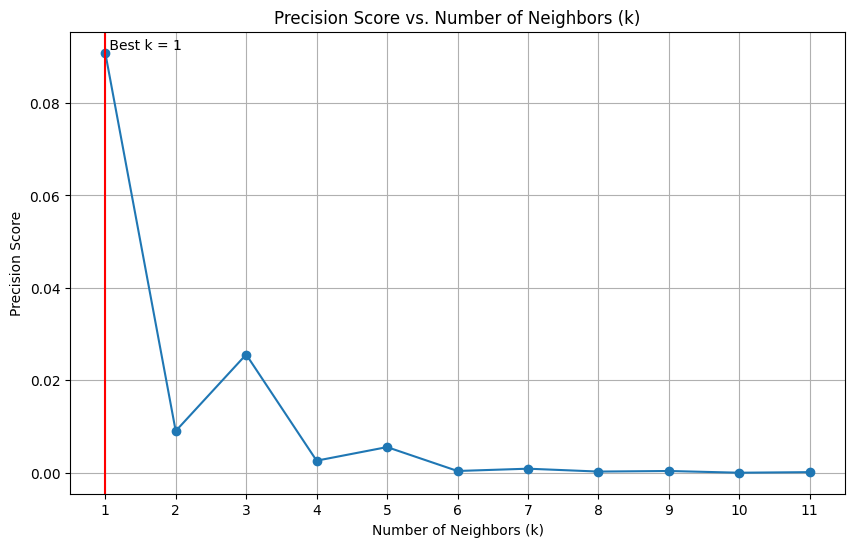

Best k: 1
Best f1 Score: 0.0909


In [ ]:
param_grid = {'n_neighbors': range(1, 12)}  # Testing k from 1 to 20

grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid,
                           scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_k = grid_search.best_params_['n_neighbors']

# Get all precision scores for plotting
results = grid_search.cv_results_
k_values = param_grid['n_neighbors']
precision_scores = results['mean_test_score']

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, precision_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Precision Score')
plt.title('Precision Score vs. Number of Neighbors (k)')
plt.xticks(k_values)
plt.grid(True)
plt.axvline(x=best_k, color='r')
plt.text(best_k, grid_search.best_score_, f' Best k = {best_k}', horizontalalignment='left', verticalalignment='bottom')
plt.show()

print(f"Best k: {best_k}")
print(f"Best f1 Score: {grid_search.best_score_:.4f}")



## use best k with KNN, find performance metrics

In [ ]:
knn = KNeighborsClassifier(n_neighbors=best_k)

kfold = KFold(n_splits=5, shuffle=True, random_state=2)
precision_scores = []
recall_scores = []
f1_scores = []

for train_idx, test_idx in kfold.split(X,y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

print(f"Precision: {np.mean(precision_scores):.4f}")
print(f"Recall: {np.mean(recall_scores):.4f}")
print(f"F1 Score: {np.mean(f1_scores):.4f}")

Precision: 0.1656
Recall: 0.0422
F1 Score: 0.0672


# MLP

In [ ]:
# for hidden_layer_sizes in [
#     # (20,) * 5,
#     # (50,) * 5,
#     # (100,) * 5,
#     # (150,) * 5,
#     (500,) * 5,
# ]:
#     for activation in [ "tanh"]:
#         mlp = MLPClassifier(
#             hidden_layer_sizes=hidden_layer_sizes,
#             activation=activation,
#             max_iter=1000,
#             solver="adam",
#             learning_rate_init=0.5
#         )
#         kfold = KFold(n_splits=5, shuffle=True, random_state=2)
#         precision_scores = []
#         recall_scores = []
#         f1_scores = []

#         for train_idx, test_idx in kfold.split(X,y):
#             X_train, X_test = X[train_idx], X[test_idx]
#             y_train, y_test = y[train_idx], y[test_idx]

#             mlp.fit(X_train, y_train)

#             y_pred = mlp.predict(X_test)

#             precision = precision_score(y_test, y_pred)
#             recall = recall_score(y_test, y_pred)
#             f1 = f1_score(y_test, y_pred)

#             precision_scores.append(precision)
#             recall_scores.append(recall)
#             f1_scores.append(f1)

#         # Output the results
#         print(f"Hidden Layer Sizes: {hidden_layer_sizes}")
#         print(f"Activation Function: {activation}")
#         print(f"Precision: {np.mean(precision_scores):.4f}")
#         print(f"Recall: {np.mean(recall_scores):.4f}")
#         print(f"F1 Score: {np.mean(f1_scores):.4f}")


## Decision Tree

In [ ]:
criterions = ["gini", "entropy", "log_loss"]
for criterion in criterions:
    decision_tree_clf = sklearn.tree.DecisionTreeClassifier(criterion=criterion, random_state=2, max_depth=25) 
    kfold = KFold(n_splits=5, shuffle=True, random_state=2)
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        decision_tree_clf.fit(X_train, y_train)

        y_pred = decision_tree_clf.predict(X_test)

        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

    print(f"Criterion: {criterion}")
    print(f"Precision: {np.mean(precision_scores):.4f}")
    print(f"Recall: {np.mean(recall_scores):.4f}")
    print(f"F1 Score: {np.mean(f1_scores):.4f}")

Criterion: gini
Precision: 0.2472
Recall: 0.1702
F1 Score: 0.2016
Criterion: entropy
Precision: 0.2063
Recall: 0.1914
F1 Score: 0.1986
Criterion: log_loss
Precision: 0.2063
Recall: 0.1914
F1 Score: 0.1986


## Gradient Boosting Classifier

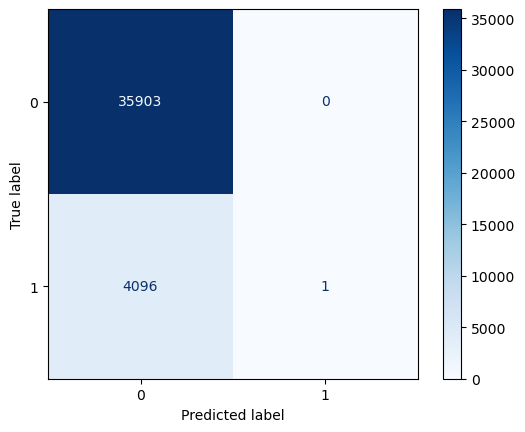

Precision: 1.0000
Recall: 0.0002
F1 Score: 0.0005


In [20]:
gradient_boosting_clf = GradientBoostingClassifier(n_estimators=20, random_state=2)
#(X_train, X_test, y_train, y_test) = model_selection.train_test_split(X, y, test_size=1/3)

gradient_boosting_clf.fit(X_train, y_train)

y_pred = gradient_boosting_clf.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)

plt.show()

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

In [21]:
penalty_options = ["l1", "l2", "elasticnet", None]

solver_options = {"lbfgs": ["l2", None], "newton-cholesky": ["l2", None],
                    "sag": ["l2", None], "saga": ["elasticnet", "l1", "l2", None]}
for solver_option, penalty_options in solver_options.items():
    for penalty_option in penalty_options:
        if penalty_option == "elasticnet":
            logistic_regression = LogisticRegression(penalty=penalty_option, solver=solver_option, random_state=2, l1_ratio=0.5)
        else:
            logistic_regression = LogisticRegression(penalty=penalty_option, solver=solver_option, random_state=2)
        kfold = KFold(n_splits=5, shuffle=True, random_state=2)
        precision_scores = []
        recall_scores = []
        f1_scores = []
    
        for train_idx, test_idx in kfold.split(X,y):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]
            logistic_regression.fit(X_train, y_train)
        
            y_pred = logistic_regression.predict(X_test)
        
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
        
            precision_scores.append(precision)
            recall_scores.append(recall)
            f1_scores.append(f1)
    
        print("Solver Option: " + solver_option + ", Penalty Option: " + str(penalty_option))
        print(f"Precision: {np.mean(precision_scores):.4f}")
        print(f"Recall: {np.mean(recall_scores):.4f}")
        print(f"F1 Score: {np.mean(f1_scores):.4f}")

c:\Users\abous\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\abous\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Solver Option: lbfgs, Penalty Option: l2
Precision: 0.6763
Recall: 0.2355
F1 Score: 0.3492


c:\Users\abous\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\abous\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Solver Option: lbfgs, Penalty Option: None
Precision: 0.6745
Recall: 0.2342
F1 Score: 0.3471
Solver Option: newton-cholesky, Penalty Option: l2
Precision: 0.6885
Recall: 0.2703
F1 Score: 0.3882
Solver Option: newton-cholesky, Penalty Option: None
Precision: 0.6890
Recall: 0.2702
F1 Score: 0.3881


c:\Users\abous\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\abous\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\abous\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\abous\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\abous\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Solver Option: sag, Penalty Option: l2
Precision: 0.6863
Recall: 0.2636
F1 Score: 0.3809


c:\Users\abous\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\abous\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\abous\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\abous\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\abous\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Solver Option: sag, Penalty Option: None
Precision: 0.6862
Recall: 0.2635
F1 Score: 0.3808


c:\Users\abous\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\abous\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\abous\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\abous\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\abous\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Solver Option: saga, Penalty Option: elasticnet
Precision: 0.6884
Recall: 0.2614
F1 Score: 0.3788


c:\Users\abous\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\abous\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\abous\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\abous\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\abous\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Solver Option: saga, Penalty Option: l1
Precision: 0.6887
Recall: 0.2613
F1 Score: 0.3789


c:\Users\abous\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\abous\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\abous\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\abous\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\abous\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Solver Option: saga, Penalty Option: l2
Precision: 0.6881
Recall: 0.2613
F1 Score: 0.3787


c:\Users\abous\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\abous\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\abous\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\abous\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Solver Option: saga, Penalty Option: None
Precision: 0.6882
Recall: 0.2614
F1 Score: 0.3788


c:\Users\abous\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
